### Quantitative Metrics for Model Evaluation

**Objective:**

  - Calculate key evaluation metrics to assess model prediction performance on the test set.
  - Understand RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error) as primary metrics for RUL prediction.
  - Implement metric calculations using the test dataset and previously trained model predictions.

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Imports and Setup

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

#### 2. Explanation: Evaluation Metrics for Regression (RUL Prediction)


2.1 Root Mean Squared Error (RMSE):
- RMSE measures the square root of the average squared differences between predicted and actual values.
- It penalizes larger errors more heavily, making it sensitive to outliers.
- Lower RMSE indicates better model performance.

Formula: RMSE = sqrt( (1/N) * Σ(y_true_i - y_pred_i)^2 )

2.2 Mean Absolute Error (MAE):
- MAE measures the average absolute differences between predicted and actual values.
- It provides a straightforward interpretation of average error magnitude.
- Less sensitive to large errors compared to RMSE.

Formula: MAE = (1/N) * Σ|y_true_i - y_pred_i|


#### 3. Load Test Data and Previous Model

In [3]:
# Assuming test data (X_test, y_test) and trained model saved as "best_lstm_model.keras"
# Load test features and labels
X_test = np.load("/content/drive/MyDrive/Infosys/MileStone3/rolling_window_sequences.npy")  # Replace with actual file path
metadata_test = pd.read_csv("/content/drive/MyDrive/Infosys/MileStone3/sequence_metadata_with_RUL.csv")  # Replace with actual file path
y_test = metadata_test["RUL"].values

print("Test feature shape:", X_test.shape)
print("Test target shape:", y_test.shape)

# Load trained LSTM model
model = tf.keras.models.load_model("/content/drive/MyDrive/Infosys/MileStone3/best_lstm_model.keras")

Test feature shape: (17631, 30, 66)
Test target shape: (17631,)


#### 4. Generate Predictions on Test Set

In [4]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten to 1-D array for metric calculations

print("Predictions shape:", y_pred.shape)

551/551 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
Predictions shape: (17631,)


#### 5. Calculate RMSE and MAE

In [5]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 5.0995
Mean Absolute Error (MAE): 3.5304


#### 6. Visualize Predicted vs Actual RUL

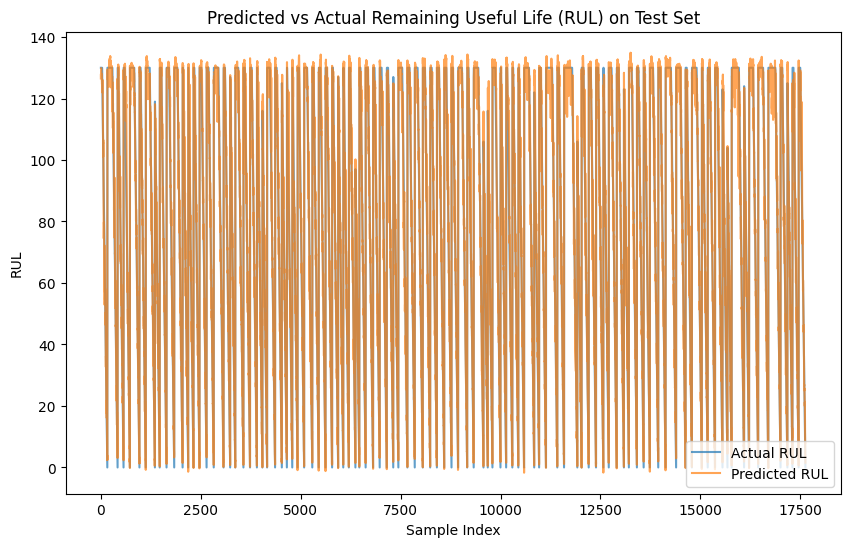

In [6]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Predicted vs Actual Remaining Useful Life (RUL) on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()